In [1]:
# Importing modules 
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2

from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,Activation,MaxPooling2D
from keras.models import Sequential
from keras.models import load_model
from sklearn.model_selection import train_test_split

np.random.seed(1)

In [2]:
# Processing training data
# -> appending images in a list 'train_images'
# -> appending labels in a list 'train_labels'

train_images = []       
train_labels = []
shape = (150,150)  
train_path = 'Data/train'

for foldername in os.listdir(train_path):
    for filename in os.listdir(train_path+"/"+foldername):
        img = cv2.imread(os.path.join(train_path+"/"+foldername,filename))
        try:
            # Resize all images to a specific shape
            img = cv2.resize(img,shape)

            # Spliting file names and storing the labels for image in list
            train_labels.append(foldername)

            train_images.append(img)
        except:
            pass
# Converting labels into One Hot encoded sparse matrix
train_labels = pd.get_dummies(train_labels).values

# Converting train_images to array
train_images = np.array(train_images)

no_of_classes = len(train_labels[0])        

# Splitting Training data into train and validation dataset
x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

In [3]:
# Processing testing data
# -> appending images in a list 'test_images'
# -> appending labels in a list 'test_labels'
# The test data contains labels as well also we are appending it to a list but we are'nt going to use it while training.

test_images = []
test_labels = []
test_path = 'Data/test'

for foldername in os.listdir(test_path):
    for filename in os.listdir(test_path+"/"+foldername):
        if filename.split('.')[1] == 'jpg':
            img = cv2.imread(os.path.join(test_path+"/"+foldername,filename))

            # Spliting file names and storing the labels for image in list
            test_labels.append(foldername)

            # Resize all images to a specific shape
            img = cv2.resize(img,shape)

            test_images.append(img)
# Converting test_images to array
test_images = np.array(test_images)

[1 0 0 0 0 0]


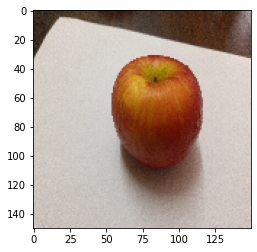

In [4]:
# Visualizing Training data
print(train_labels[0])
plt.imshow(cv2.cvtColor(train_images[0], cv2.COLOR_BGR2RGB))

In [5]:
train_labels

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0]], dtype=uint8)

In [6]:
def show_image(index):
    print(train_labels[index])
    #plt.imshow(test_images[index])
    cv2.imshow('win',train_images[index])
    cv2.waitKey(0)
    cv2.destroyAllWindows()
show_image(448)

[0 0 0 1 0 0]


[1 0 0 0 0 0]


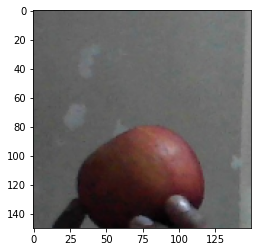

In [7]:
# Visualizing Training data
print(train_labels[4])
plt.imshow(cv2.cvtColor(train_images[4], cv2.COLOR_BGR2RGB))

# Augment Data

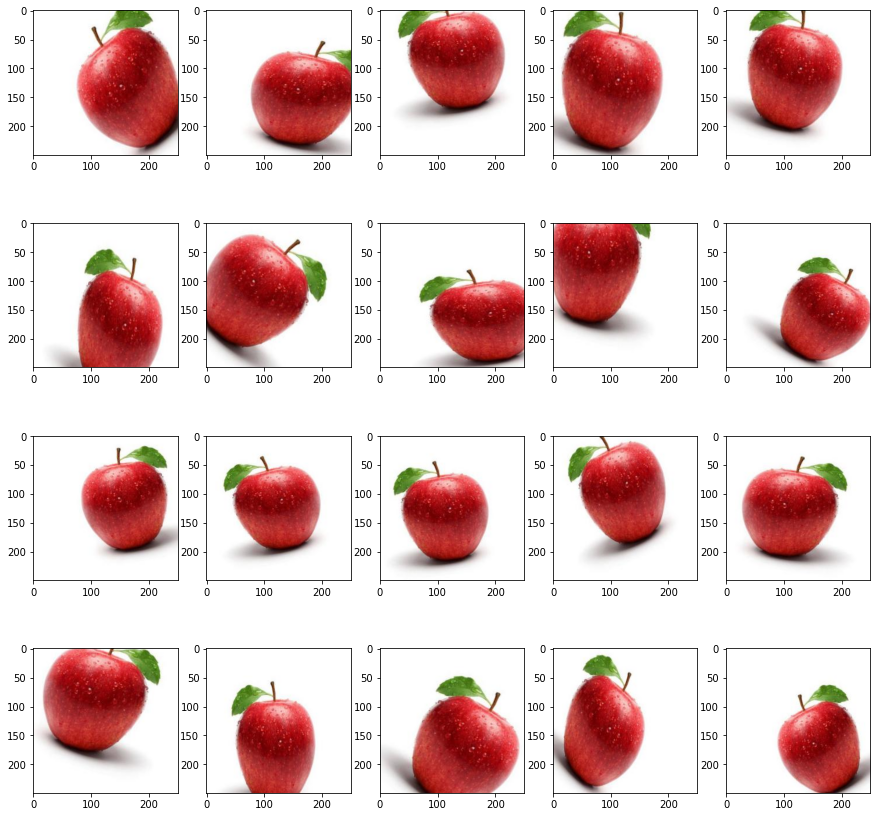

In [8]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img(train_path+'/apple/apple_2.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='Data/Augmented Pictures', save_prefix='augmented_apple_', save_format='jpeg'):
    i += 1
    if i > 21:
        break

        
augmented_pictures = [cv2.imread(os.path.join("Data/Augmented Pictures",img)) for img in os.listdir("Data/Augmented Pictures")]
augmented_pictures.insert(0,'')
w=10
h=10
fig=plt.figure(figsize=(15, 15))
columns = 5
rows = 4
for i in range(1, columns*rows +1):
    img = augmented_pictures[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.show()

In [9]:

datagen.fit(x_train, augment=True)

In [10]:
#Building model 1 using customized convolutional and pooling layers

model = Sequential()

#input_shape is 100*100 since thats the dimension of each of the fruit images
model.add(Conv2D(filters = 32, kernel_size = 2,input_shape=(150,150,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'tanh'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu'))
model.add(MaxPooling2D(pool_size=2))


model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

# specifying parameters for fully connected layer
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(150,activation= 'relu'))
model.add(Dense(75,activation= 'relu'))
model.add(Dropout(0.6))
model.add(Dense(no_of_classes,activation = 'softmax'))


In [11]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      416       
_________________________________________________________________
activation (Activation)      (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 74, 74, 32)        4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 36, 36, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0

In [12]:
from keras.optimizers import SGD, Adam, RMSprop

optimizer = Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

## Training takes 10 minutes     Hold your horses!!!!!

In [13]:
# fitting model using above defined layers 
CNN_model = model.fit(x_train,y_train,epochs=20,batch_size=50,validation_data=(x_val,y_val),verbose=2, shuffle=True)
'''
This is with augmentation but it failed
CNN_model = model.fit_generator(datagen.flow(x_train,y_train,batch_size=120),validation_data=(x_val,y_val),epochs=20,steps_per_epoch=len(x_train)/120,shuffle=True)'''

Epoch 1/20
25/25 - 13s - loss: 1.8442 - accuracy: 0.2369 - val_loss: 1.4468 - val_accuracy: 0.4928
Epoch 2/20
25/25 - 13s - loss: 1.3064 - accuracy: 0.4747 - val_loss: 0.9162 - val_accuracy: 0.6779
Epoch 3/20
25/25 - 13s - loss: 0.9339 - accuracy: 0.6410 - val_loss: 0.5513 - val_accuracy: 0.7788
Epoch 4/20
25/25 - 14s - loss: 0.6827 - accuracy: 0.7341 - val_loss: 0.4216 - val_accuracy: 0.8726
Epoch 5/20
25/25 - 14s - loss: 0.4989 - accuracy: 0.8233 - val_loss: 0.3065 - val_accuracy: 0.8894
Epoch 6/20
25/25 - 14s - loss: 0.4528 - accuracy: 0.8386 - val_loss: 0.3032 - val_accuracy: 0.8726
Epoch 7/20
25/25 - 14s - loss: 0.3461 - accuracy: 0.8859 - val_loss: 0.1952 - val_accuracy: 0.9399
Epoch 8/20
25/25 - 15s - loss: 0.2832 - accuracy: 0.8964 - val_loss: 0.2441 - val_accuracy: 0.9111
Epoch 9/20
25/25 - 14s - loss: 0.2468 - accuracy: 0.9229 - val_loss: 0.1379 - val_accuracy: 0.9543
Epoch 10/20
25/25 - 16s - loss: 0.2478 - accuracy: 0.9189 - val_loss: 0.1313 - val_accuracy: 0.9543
Epoch 11/

'CNN_model = model.fit_generator(datagen.flow(x_train,y_train,batch_size=120),validation_data=(x_val,y_val),epochs=20,steps_per_epoch=len(x_train)/120,shuffle=True)'

# New Model

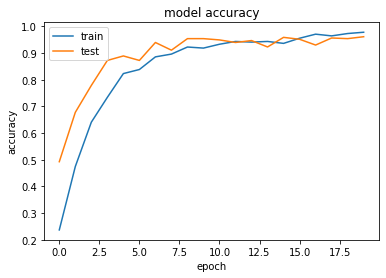

In [14]:
# summarize history for accuracy
plt.plot(CNN_model.history['accuracy'])
plt.plot(CNN_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

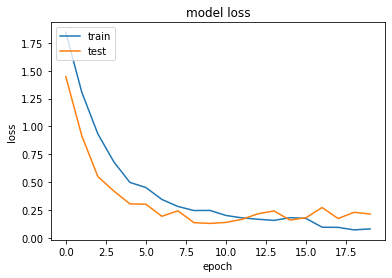

In [15]:
# summarize history for loss
plt.plot(CNN_model.history['loss'])
plt.plot(CNN_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
#Saving the model
model.save('newmodel.h5')
model.save('FoodApp/newmodel.h5')

#loss: 0.0928 - acc: 0.9333 - val_loss: 0.7667 - val_acc: 0.8333


In [17]:
#Loading the model
model = load_model('newmodel.h5')
history  = CNN_model

In [18]:
# Evaluating model on validation data
evaluate = model.evaluate(x_val,y_val)
print(evaluate)

13/13 [==============================] - 1s 66ms/step - loss: 0.2156 - accuracy: 0.9615
[0.21563218533992767, 0.9615384340286255]


In [19]:
output = {0:'apple',1:'banana',2:'dragonfruit',3:'kiwi',4:'lemon',5:'orange'}


In [20]:
# Testing predictions and the actual label
checkImage = test_images[0:1]
checklabel = test_labels[0:1]

predict = model.predict(np.array(checkImage))


print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])

Actual :-  ['apple']
Predicted :-  apple


# Testing by Ramkishor

In [21]:
def show_image(index):
    print(test_labels[index])
    #plt.imshow(test_images[index])
    cv2.imshow('win',test_images[index])
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [22]:
# Testing predictions and the actual label
def test(index):
    checkImage = test_images[index:index+1]
    checklabel = test_labels[index:index+1]

    predict = model.predict(np.array(checkImage))

    #print("Actual :- ",checklabel)
    #print("Predicted :- ",output[np.argmax(predict)])
    
    return checklabel,output[np.argmax(predict)]
    #show_image(index)


In [23]:
correct_count = 0
incorrect_count = 0
for i in range(10,len(test_images)):
    Actual,Predicted = test(i)

    
    if Actual[0] == Predicted:
        correct_count+=1
        #print(f"{Actual[0]} is predicted as {Predicted}")
        #show_image(i)
    else:
        incorrect_count+=1
        #print(f"{Actual[0]} is predicted as {Predicted}")
        #show_image(i)
print()
print(f"correct_count = {correct_count}")
print(f"incorrect_count = {incorrect_count}")


correct_count = 202
incorrect_count = 28


In [24]:
NewTestPath = 'Data/NewTestData'
my_test_images=[]
my_test_labels=[]

for filename in os.listdir(NewTestPath):
        img = cv2.imread(os.path.join(NewTestPath,filename))
        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
                
        # Spliting file names and storing the labels for image in list
        my_test_labels.append(filename.split('_')[0])
        

        my_test_images.append(img)


def test(index):
    checkImage = my_test_images[index:index+1]
    Actual = my_test_labels[index]
    predict = model.predict(np.array(checkImage))

    #print("Actual :- ",checklabel)
    #print("Predicted :- ",output[np.argmax(predict)])
    
    return Actual,output[np.argmax(predict)]
    #show_image(index)
def show_image(index):
    #plt.imshow(test_images[index])
    cv2.imshow('win',my_test_images[i])
    cv2.waitKey(0)
    cv2.destroyAllWindows()


for i in range(len(my_test_images)):
    Actual,Predicted = test(i)
    print(f"{Actual} is predicted as {Predicted}")
    #show_image(i)

error: OpenCV(4.2.0) ../modules/imgproc/src/resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'resize'
